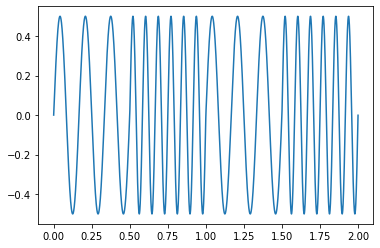

In [2]:
# FSKで変調した波の生成
# 定数の定義
amp = 0.5        # 振幅
one_freq = 12    # 1を表す周波数
zero_freq = 6    # 0を表す周波数
sr = 44100       # サンプリング周波数
period_sec = 0.5 # 信号周期

# 変調するデータ
bin_data = np.array([0,1,0,1])

# 変調する音波全体の時間の計算
t_sec = period_sec * len(bin_data)

# サンプリング時間
t = np.linspace(0, t_sec, int(t_sec * sr))[:-1] # 0か1のデータ判定において配列を超えてしまうので、最後のデータは捨てる

# サンプリング点において表現すべきデータが1であるかの判定
on = np.vectorize(lambda x: bin_data[int(x // period_sec)] == 1)(t) 

# サンプリング点において表現すべきデータが0であるかの判定
off = np.invert(on)

#  サンプリング点において適用すべき関数の条件配列
condtion_list = [on, off]

#  条件を満たす時に適用する関数リスト
func_list = [
    lambda x: amp * np.sin(2 * np.pi * one_freq * x), # 1の波形
    lambda x: amp * np.sin(2 * np.pi * zero_freq * x) # 0の波形
]

# サンプリング点において条件を満たす波形の取得
y = np.piecewise(t, condtion_list, func_list)

plt.plot(t, y)

In [3]:
1.9 // 1

1.0

In [4]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [5]:
# vectorizeで各要素を自乗する
np.vectorize(lambda x: x * x)(a)

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])

In [8]:
# piecewiseで5よりちいさいものは0、5以上のものは1に変換
np.piecewise(a, [a < 5, 5 <= a], [0, 1])

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [10]:
# 可聴域で変調されたFSK音波の保存

# 定数の定義
one_freq = 440  # 1を表す周波数
zero_freq = 220 # 0を表す周波数
quant_dtype = np.int16 # 量子化ビット

#  条件を満たす時に適用する関数リスト
func_list = [
    lambda x: amp * np.sin(2 * np.pi * one_freq * x), # 1を表す波形
    lambda x: amp * np.sin(2 * np.pi * zero_freq * x) # 0を表す波形
]

# サンプリング点において条件を満たす波形
y = np.piecewise(t, condtion_list, func_list)

#  量子化
y = (y / max(np.abs(y)) * np.iinfo(quant_dtype).max).astype(quant_dtype)

# 保存
import scipy.io.wavfile as siw
siw.write("fsk.wav", sr, y)